In [1]:
%load_ext autoreload
%autoreload 2

In [49]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from call_tree import *

In [3]:
def computeForceError(f_tree, f_direct):
    eta = np.linalg.norm(f_tree - f_direct, axis=1) / np.linalg.norm(f_direct, axis=1)
    return np.mean(eta)

In [4]:
nparticles = 500
np.random.seed(42)
particles = np.random.rand(nparticles, 3)
openingAngle = 0.8

f_tree, q, t_tree = computeWithTree(particles, openingAngle)
f_numpy, t_direct = computeWithDirectSummationNumpy(particles)
# f_direct = computeWithDirectSummation(particles)
#np.set_printoptions(precision=10, suppress=True)
err = computeForceError(f_tree, f_numpy)
#print(f_tree)
#print(f_numpy)
#print(f_direct)
print("Mean error: ", err)
print("Mean number of interactions per particle: ", np.mean(q.interactions))

Starting tree gravity with  500  particles and theta =  0.8
starting N^2 gravity with  500  particles
Mean error:  0.021991847285217553
Mean number of interactions per particle:  69.18


In [13]:
data = pd.read_table("../c/output.dat", header=None, 
                     names=["N", r"$\theta$", "Interactions", "Error", r"$t_{tree}$", r"$t_{direct}$"])
data

N  $\theta$  Interactions     Error  $t_{tree}$  $t_{direct}$
0    5000       0.2    1736.47660  0.000279    1.329884      2.130270
1    5000       0.4     502.84540  0.002177    0.365606      2.144338
2    5000       0.8     110.96760  0.014870    0.075980      2.140981
3   10000       0.2    2404.88760  0.000245    3.875190      8.624627
4   10000       0.4     622.90950  0.001814    0.922707      8.583155
5   10000       0.8     128.75730  0.012750    0.183642      8.562753
6   20000       0.2    3121.22305  0.000225   10.700510     34.351988
7   20000       0.4     738.40220  0.001528    2.251341     34.435487
8   20000       0.8     145.19680  0.010590    0.419980     34.486685
9   40000       0.2    3977.42620  0.000195   26.184368    139.690783
10  40000       0.4     867.96900  0.001300    5.185116    140.668758
11  40000       0.8     162.82950  0.008906    0.934261    138.977923

2.0111193550918354 1.2764883924042953


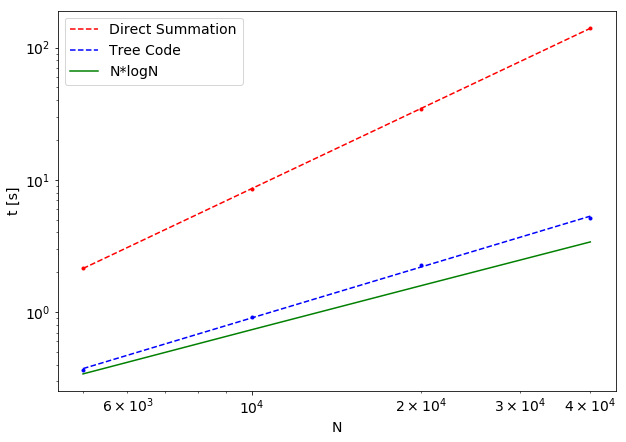

Time for 10^{10} particles: tree: 1.31 yrs, direct: 318230.59 yrs


In [89]:
data_4 = data.loc[data.iloc[:,1] == 0.4]
n = data_4["N"].values
t_tree = data_4.iloc[:,-2].values
t_direct = data_4.iloc[:,-1].values

slope_d, intercept_d, r_value_d, p_value_d, std_err_d = stats.linregress(np.log10(n), np.log10(t_direct))
slope_t, intercept_t, r_value_t, p_value_t, std_err_t = stats.linregress(np.log10(n), np.log10(t_tree))

print(slope_d, slope_t)
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(10,7))
plt.loglog(n, t_tree, 'b.')
plt.loglog(n, t_direct, 'r.')
plt.loglog(n, 10**(slope_d*np.log10(n) + intercept_d), 'r--', label="Direct Summation")
plt.loglog(n, 10**(slope_t*np.log10(n) + intercept_t), 'b--', label="Tree Code")
plt.loglog(n, 8e-6*n*np.log(n), 'g-', label="N*logN")
plt.xlabel("N")
plt.ylabel("t [s]")
plt.legend(loc="upper left")
plt.show()

t10d = 10**(slope_d*10+intercept_d) / (86400 * 365)
t10t = 10**(slope_t*10+intercept_t) / (86400 * 365)
print("Time for 10^{10} particles: tree: %1.2f yrs, direct: %1.2f yrs" % (t10t, t10d))

Starting tree gravity with  30  particles and theta =  0.8


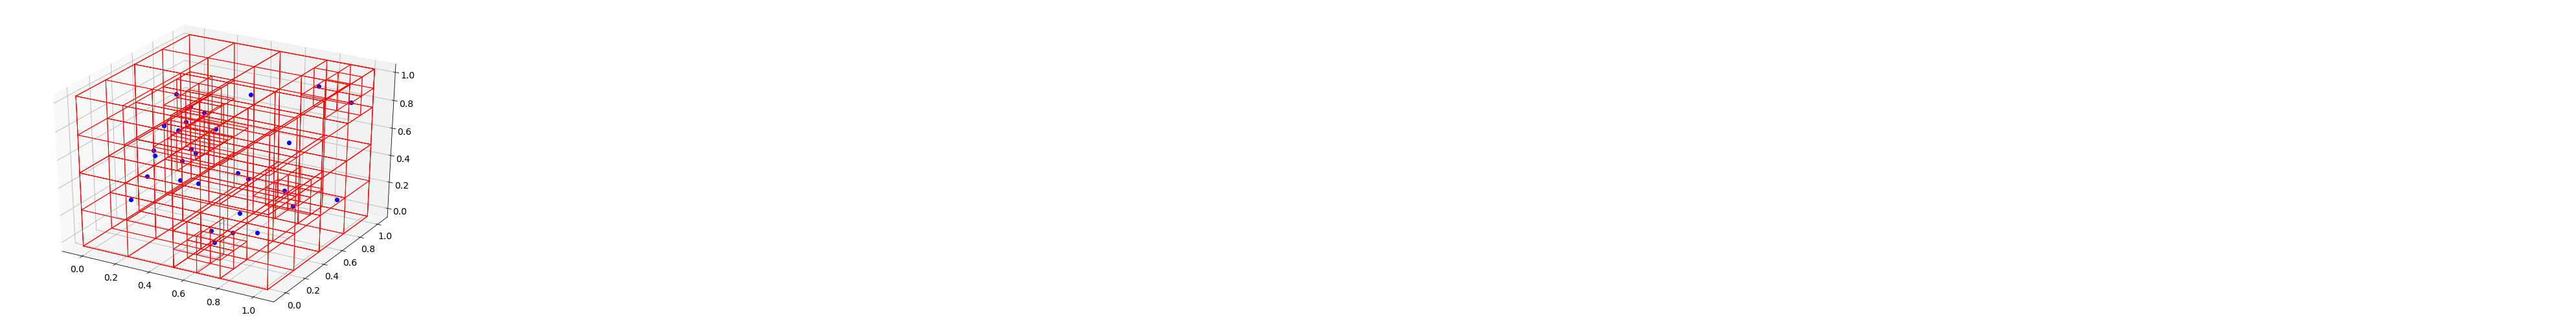

In [92]:
nparticles = 30
np.random.seed(42)
particles = np.random.rand(nparticles, 3)
openingAngle = 0.8

f_tree, q, t_tree = computeWithTree(particles, openingAngle)

from mpl_toolkits.mplot3d import Axes3D
plt.ion()

fig = plt.figure(figsize=(12, 9))
ax = fig.gca(projection='3d')

def plot_cube(x,y,z,size):
    x12 = np.array([x-size/2.,x+size/2.])
    y12 = np.array([y-size/2.,y+size/2.])
    z12 = np.array([z-size/2.,z+size/2.])
    ones = np.ones(2)
    ax.plot(x12,y12[0]*ones,z12[0]*ones,'-',color='red', linewidth=0.9)
    ax.plot(x12,y12[1]*ones,z12[0]*ones,'-',color='red', linewidth=0.9)
    ax.plot(x12,y12[0]*ones,z12[1]*ones,'-',color='red', linewidth=0.9)
    ax.plot(x12,y12[1]*ones,z12[1]*ones,'-',color='red', linewidth=0.9)
    ax.plot(x12[0]*ones,y12,z12[0]*ones,'-',color='red', linewidth=0.9)
    ax.plot(x12[1]*ones,y12,z12[0]*ones,'-',color='red', linewidth=0.9)
    ax.plot(x12[0]*ones,y12,z12[1]*ones,'-',color='red', linewidth=0.9)
    ax.plot(x12[1]*ones,y12,z12[1]*ones,'-',color='red', linewidth=0.9)
    ax.plot(x12[0]*ones,y12[0]*ones,z12,'-',color='red', linewidth=0.9)
    ax.plot(x12[0]*ones,y12[1]*ones,z12,'-',color='red', linewidth=0.9)
    ax.plot(x12[1]*ones,y12[0]*ones,z12,'-',color='red', linewidth=0.9)
    ax.plot(x12[1]*ones,y12[1]*ones,z12,'-',color='red', linewidth=0.9)
    
masses = np.array(q.particles)
plt.plot(masses[:,0],masses[:,1],masses[:,2],'o',color='blue')

for i in range(len(q.nodelist)):
    plot_cube(q.nodelist[i].xc[0],q.nodelist[i].xc[1],q.nodelist[i].xc[2],q.nodelist[i].size)
plt.show()